In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_wavlm.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [1024], output_dim = 6, dropout = 0.3).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 0.8847,                    Train Accuracy: 0.6804,                    Train Precision: 0.6782,                    Train Recall 0.6804.
Val Loss: 0.8553,                    Val Accuracy: 0.6924,                    Val Precision: 0.6945,                    Val Recall: 0.6924.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.7417,                    Train Accuracy: 0.7320,                    Train Precision: 0.7308,                    Train Recall 0.7320.
Val Loss: 0.7410,                    Val Accuracy: 0.7300,                    Val Precision: 0.7404,                    Val Recall: 0.7300.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.6680,                    Train Accuracy: 0.7629,                    Train Precision: 0.7628,                    Train Recall 0.7629.
Val Loss: 0.6836,                    Val Accuracy: 0.7495,                    Val Precision: 0.7510,                    Val Recall: 0.7495.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.6172,                    Train Accuracy: 0.7765,                    Train Precision: 0.7762,                    Train Recall 0.7765.
Val Loss: 0.6554,                    Val Accuracy: 0.7609,                    Val Precision: 0.7611,                    Val Recall: 0.7609.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.5759,                    Train Accuracy: 0.7922,                    Train Precision: 0.7925,                    Train Recall 0.7922.
Val Loss: 0.6254,                    Val Accuracy: 0.7770,                    Val Precision: 0.7767,                    Val Recall: 0.7770.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.5419,                    Train Accuracy: 0.8041,                    Train Precision: 0.8043,                    Train Recall 0.8041.
Val Loss: 0.6160,                    Val Accuracy: 0.7743,                    Val Precision: 0.7770,                    Val Recall: 0.7743.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.5130,                    Train Accuracy: 0.8143,                    Train Precision: 0.8147,                    Train Recall 0.8143.
Val Loss: 0.6257,                    Val Accuracy: 0.7703,                    Val Precision: 0.7687,                    Val Recall: 0.7703.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.4905,                    Train Accuracy: 0.8224,                    Train Precision: 0.8226,                    Train Recall 0.8224.
Val Loss: 0.6076,                    Val Accuracy: 0.7717,                    Val Precision: 0.7732,                    Val Recall: 0.7717.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.4637,                    Train Accuracy: 0.8315,                    Train Precision: 0.8319,                    Train Recall 0.8315.
Val Loss: 0.5899,                    Val Accuracy: 0.7817,                    Val Precision: 0.7808,                    Val Recall: 0.7817.
--------------------------------------------------


BEST EPOCH: 37.00          BEST ACCURACY: 0.79          BEST PRECISION: 0.79          BEST RECALL: 0.79


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

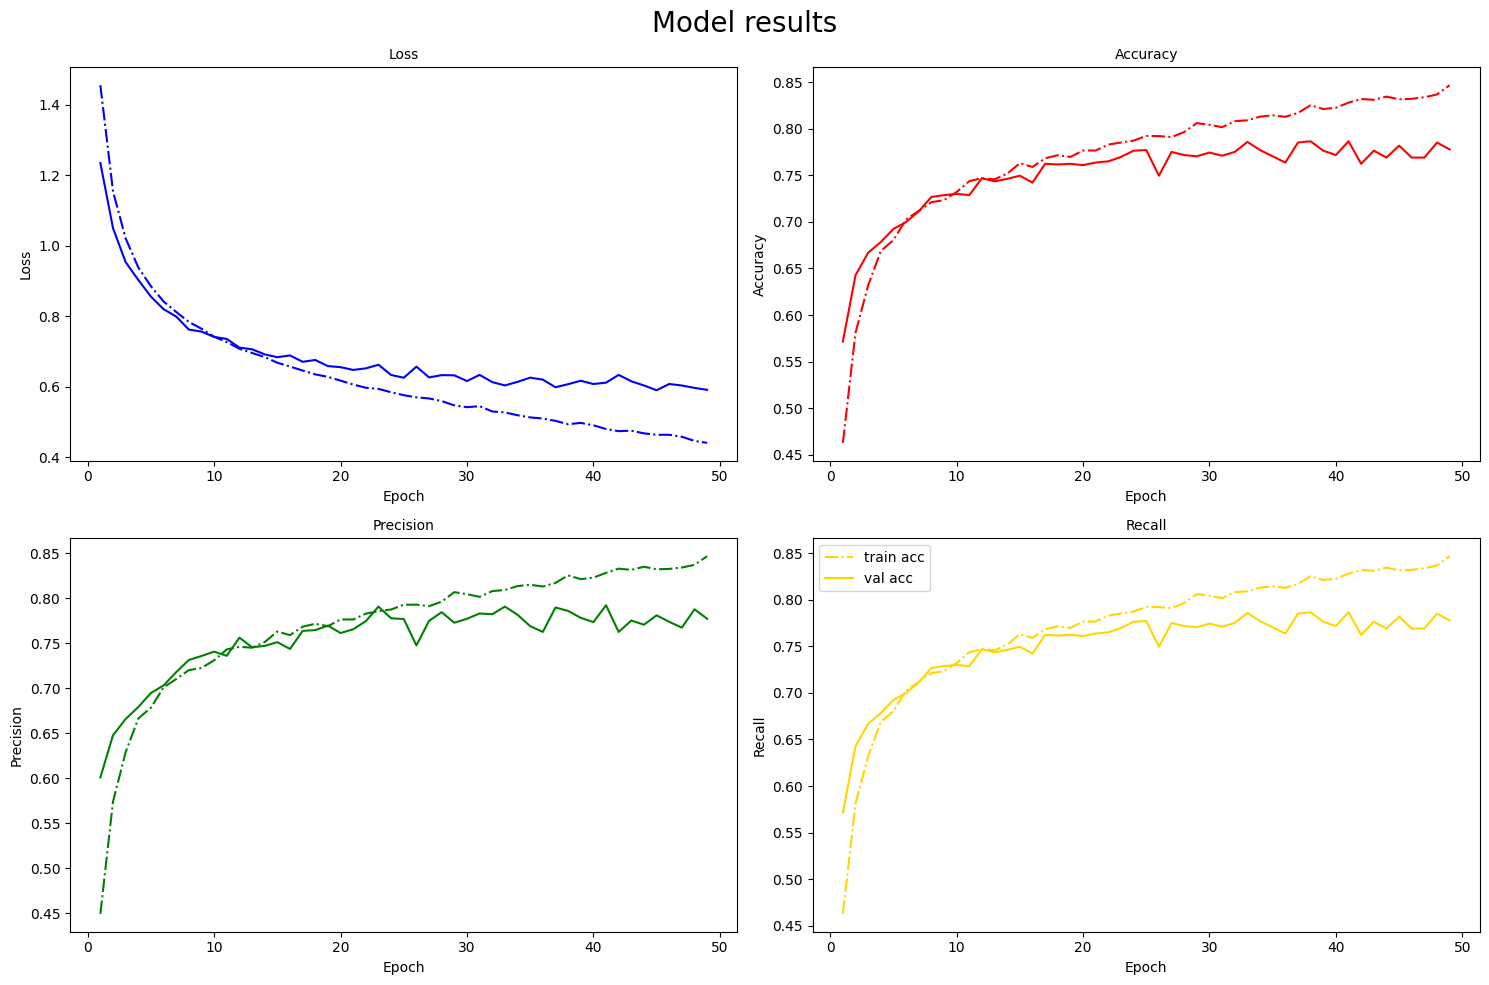

In [7]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

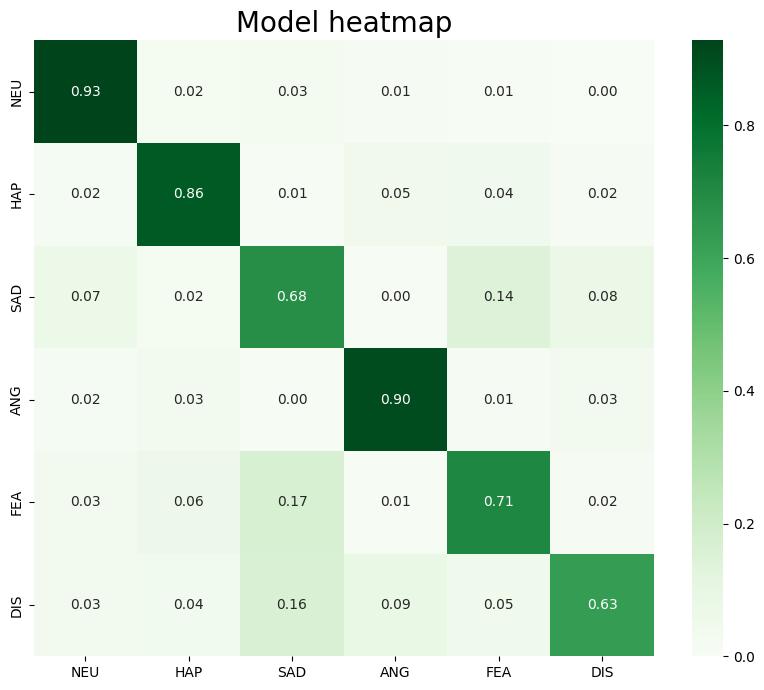

In [8]:
plot_confusion_matrix(cm)